In [4]:
from pandas import DataFrame, read_csv
from IPython.display import display, Latex
from sklearn.linear_model import LinearRegression
from data_analytics.github import display_jupyter_notebook_header

# [Machine Learning - Linear Regression](https://github.com/marcocrowe/learn-machine-learning "Machine Learning - Linear Regression")

In [5]:
display_jupyter_notebook_header(
    "marcocrowe", "learn-machine-learning", "linear-regression.ipynb"
)

,online editors,


## Sample Question - Weather Entropy

In [15]:
filepath = "question-2-b.csv"
data_frame: DataFrame = read_csv(filepath)
x_label = "x"
y_label = "y"
data_frame

,x,y
0,7,6
1,19,10
2,33,14
3,42,23


### Using LinearRegression Library

In [20]:
features = data_frame[[x_label]]
target = data_frame[y_label]

linear_regression_model = LinearRegression()
_ = linear_regression_model.fit(features, target)

m = linear_regression_model.coef_[0]
print(f"{m:.2f}")

0.45


In [21]:
guests = 730
guests_to_predict_cost_data_frame = DataFrame({x_label: [guests]})
predicted_wedding_cost = linear_regression_model.predict(
    guests_to_predict_cost_data_frame
)

print(
    f"The predicted wedding cost for a wedding with {guests} party guests is: ${predicted_wedding_cost[0]:.2f}"
)

The predicted wedding cost for a wedding with 730 party guests is: $331.39


### Using Calculations

In [17]:
x_mean = data_frame[x_label].mean()
y_mean = data_frame[y_label].mean()

calculations_data_frame = data_frame.copy()
calculations_data_frame["(x - x̄)"] = data_frame[x_label] - x_mean
calculations_data_frame["(y - ȳ)"] = data_frame[y_label] - y_mean
calculations_data_frame["(x - x̄)(y - ȳ)"] = (
    calculations_data_frame["(x - x̄)"] * calculations_data_frame["(y - ȳ)"]
)
calculations_data_frame["(x - x̄)²"] = calculations_data_frame["(x - x̄)"] ** 2
calculations_data_frame

,x,y,(x - x̄),(y - ȳ),(x - x̄)(y - ȳ),(x - x̄)²
0,7,6,-18.25,-7.25,132.3125,333.0625
1,19,10,-6.25,-3.25,20.3125,39.0625
2,33,14,7.75,0.75,5.8125,60.0625
3,42,23,16.75,9.75,163.3125,280.5625


slope of the regression line is:

$b_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$

where:

In [18]:
# slope of the regression line is:
dev_prod = calculations_data_frame["(x - x̄)(y - ȳ)"].sum()
dev_sq = calculations_data_frame["(x - x̄)²"].sum()

b1 = dev_prod / dev_sq
print(f"{b1:.2f}")

0.45


The y-intercept $b_0$ in a linear regression model can be calculated using the following formula:

$b_0 = y_{\text{mean}} - b_1 \cdot x_{\text{mean}}$

Where:

- $y_{\text{mean}}$ is the mean of the target variable (in your case, the mean of the wedding cost).
- $x_{\text{mean}}$ is the mean of the independent variable (in your case, the mean of the number of guests).
- $b_1$ is the slope of the regression line, which you calculated earlier.

The formula for calculating the y-intercept is derived from the equation of a straight line:

$y = b_0 + b_1 \cdot x$

Given a mean value for $x$ and $y$, you can rearrange the formula to solve for $b_0$:

$b_0 = y_{\text{mean}} - b_1 \cdot x_{\text{mean}}$

You can plug in the calculated slope $b_1$, and the means of $x$ and $y$ to calculate the y-intercept.

Let's apply this formula using the values you provided:

- $y_{\text{mean}} = 455.50$ (mean of the wedding cost).
- $x_{\text{mean}} = 723.50$ (mean of the number of guests).
- $b_1 = 0.62$ (slope of the regression line).


In [19]:
b0 = y_mean - m * x_mean
text = "$b_0 = \overline{y} - b_1 \\times \overline{x}$\n\n"
text += f"$b_0 = {y_mean:.2f} - {m:.4f} \\times {x_mean:.2f}$\n\n"
text += f"$b_0 =  {y_mean:.2f} - {m*x_mean:.2f} = {b0:.2f}$"
display(Latex(text))

<>:2: SyntaxWarning: invalid escape sequence '\o'
<>:2: SyntaxWarning: invalid escape sequence '\o'
C:\Users\user\AppData\Local\Temp\ipykernel_20244\2879069120.py:2: SyntaxWarning: invalid escape sequence '\o'
  text = "$b_0 = \overline{y} - b_1 \\times \overline{x}$\n\n"


<IPython.core.display.Latex object>

In the context of a linear regression model, the predicted wedding cost $E(y)$ for a given number of guests $x$ can be calculated using the regression line equation. The equation is:

$E(y) = b_0 + b_1 \cdot x$

Where:

- $E(y)$ is the predicted wedding cost.
- $b_0$ is the y-intercept of the regression line (also called the constant term).
- $b_1$ is the slope of the regression line.
- $x$ is the given number of guests (the independent variable).

Given the number of guests you want to predict the wedding cost for, you can plug in the values of $b_0$, $b_1$, and $x$ into the formula to calculate the predicted wedding cost:

$E(y) = b_0 + b_1 \cdot x$

Let's break it down step by step:

1. **Identify the number of guests ($x$):**
   - This is the independent variable for which you want to predict the wedding cost. For example, if you want to predict the cost for a wedding with 730 guests, then $x = 730$.

2. **Calculate the predicted wedding cost ($E(y)$):**
   - Use the formula $E(y) = b_0 + b_1 \cdot x$.
   - Plug in the values of $b_0$ and $b_1$ (as calculated earlier) and the given number of guests ($x$).


In [9]:
y = b0 + b1 * guests

text = f"$b_0 = {b0:.2f}, b_1 = {b1:.2f}, x = {guests}$\n\n"
text += "$y = b_0 + b_1 \\times x$\n\n"
text += f"$y={b0:.2f} + {b1:.2f} \\times {guests}$\n\n"
text += f"$y = {b0:.2f} + {b1*guests:.2f}$\n\n"
text += f"$y = {y:.2f}$"

display(Latex(text))
print(f"The predicted wedding cost for a wedding with {guests} party guests is: ${y:.2f}")

<IPython.core.display.Latex object>

The predicted wedding cost for a wedding with 730 party guests is: $459.53


### Question 4.C (5 Marks)

A scientist is interested in assessing the relationship between two variables $V_1$ (independent) and $V_2$ (dependent) and takes $n = 10$ sample values from a lab experiment. Given $r \approx -0.96$:

1. **Sketch a scatter-plot to visualize the overall pattern of the lab results.**  
   *(2 Marks)*

2. **Comment on the causal relationship between $V_1$ and $V_2$.**  
   *(3 Marks)*

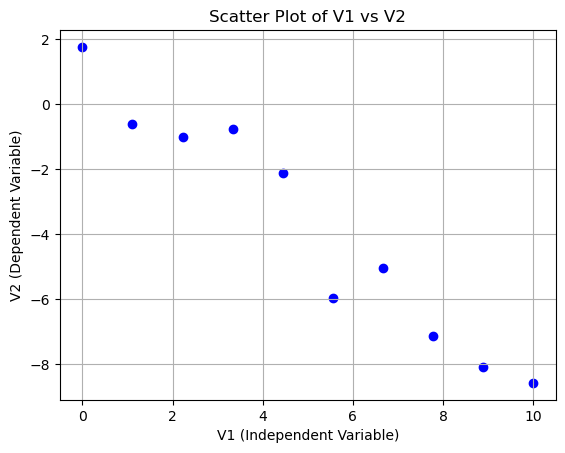

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(0)

# Generate sample data
n = 10
V1 = np.linspace(0, 10, n)
# Generate V2 with a strong negative correlation to V1
V2 = -0.97 * V1 + np.random.normal(0, 1, n)

# Create scatter plot
plt.scatter(V1, V2, color="blue")
plt.title("Scatter Plot of V1 vs V2")
plt.xlabel("V1 (Independent Variable)")
plt.ylabel("V2 (Dependent Variable)")
plt.grid(True)
plt.show()

---

Copyright &copy; 2024 Mark Crowe <https://github.com/marcocrowe>. All rights reserved.
